In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *
from fastai.vision.gan import *
from torchvision.models import vgg16_bn

In [2]:
#Change this to where your images are
path = Path('/home/ubuntu/NepalImages')
path_100 = path/'cropped-100'
path_hr= path/'cropped_into_4'

#its fine to define a path to something that doesn't exist
path_lr = path/'cropped_into_4_96'

In [3]:
src = ImageImageList.from_folder(path_100).split_by_rand_pct(0.1, seed=42)

def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_100/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [4]:
bs,size=1,500

data_gen = get_data(bs,size)

In [5]:
learn_gen = None
gc.collect()

7

In [6]:
learn_gen = unet_learner(data_gen, models.resnet34, wd=1e-3, loss_func=MSELossFlat(),
                     blur=True, norm_type=NormType.Weight)

In [9]:
# learn_gen.load('gan-gen_v2-1');
learn_gen.load('gan-gen_v4-epoch1');

In [10]:
# learn_gen = load_learner(path_100);
learn_gen.data = get_data(bs,500)

In [11]:
def superres_1(inp):
    img = open_image(inp);    
    p,img_hr,b = learn_gen.predict(img)
    return img_hr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


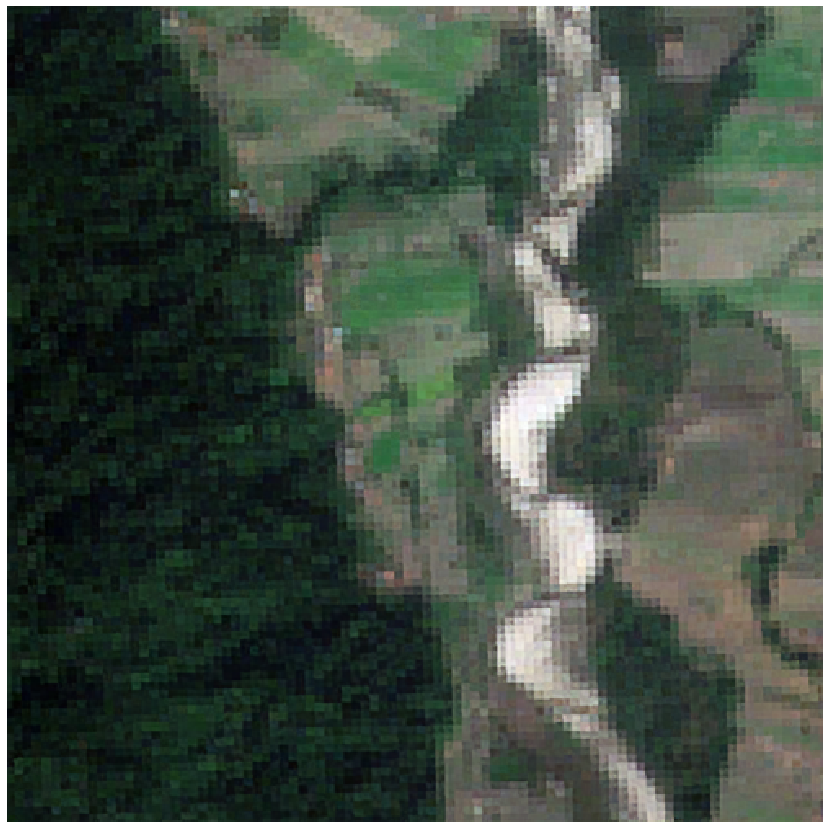

In [12]:
#1 iter
Image(superres_1('./test/test_scale_1-2.tif')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


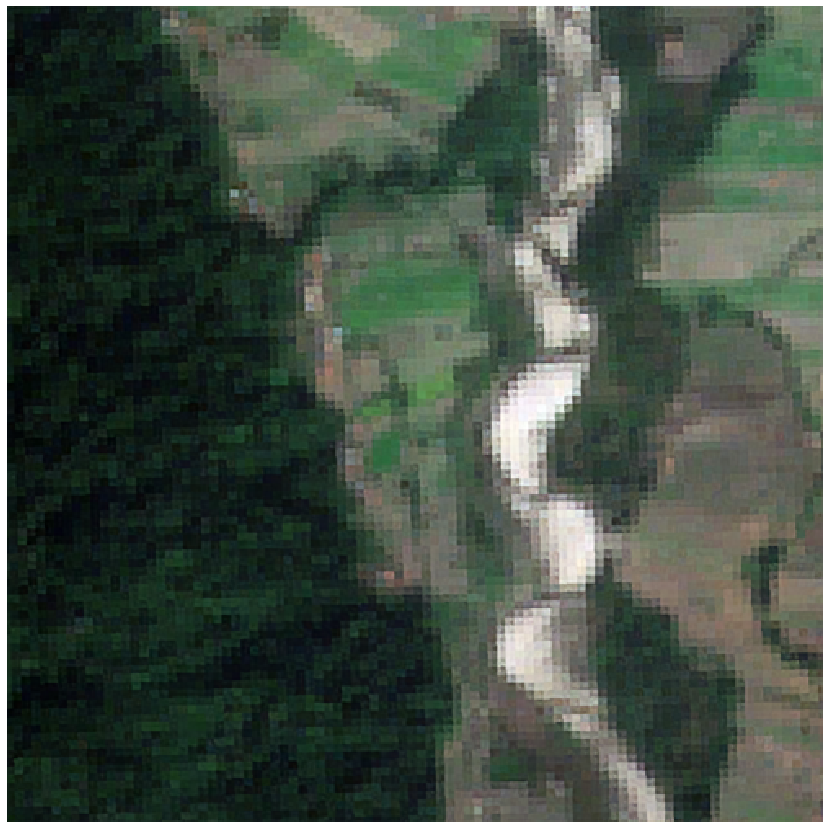

In [14]:
#5 iters
Image(superres_1('./test/test_scale_1-2.tif')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


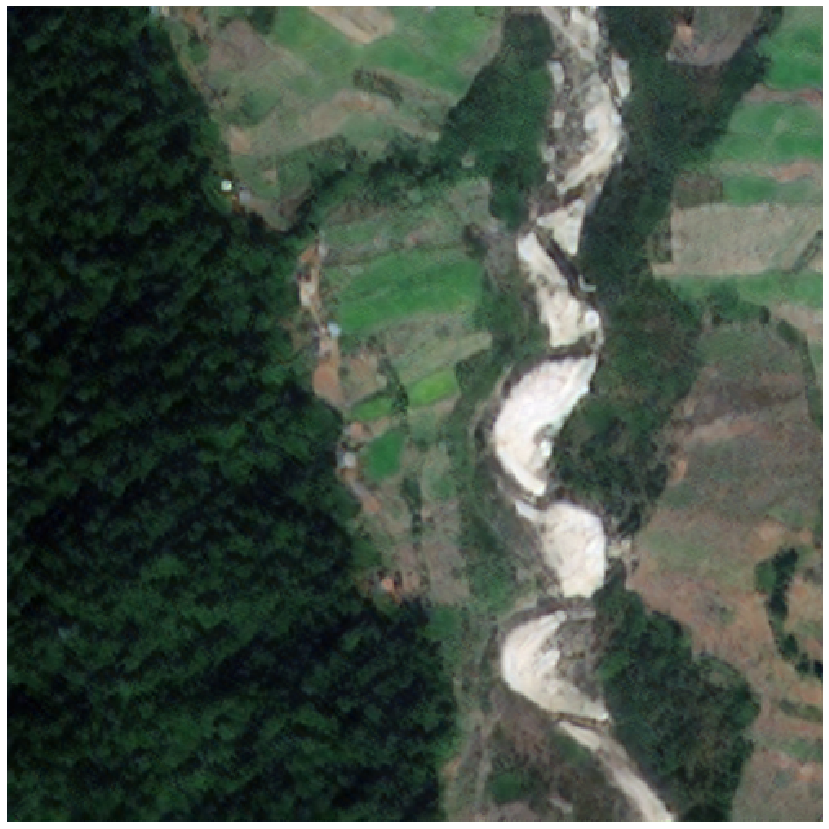

In [11]:
#gold standard
Image(superres_1('./test/deepimageprior_3kiters.jpg')).show(figsize=(18,15))

In [ ]:
#1 iter
Image(superres_1('./test/deepimageprior_3kiters.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


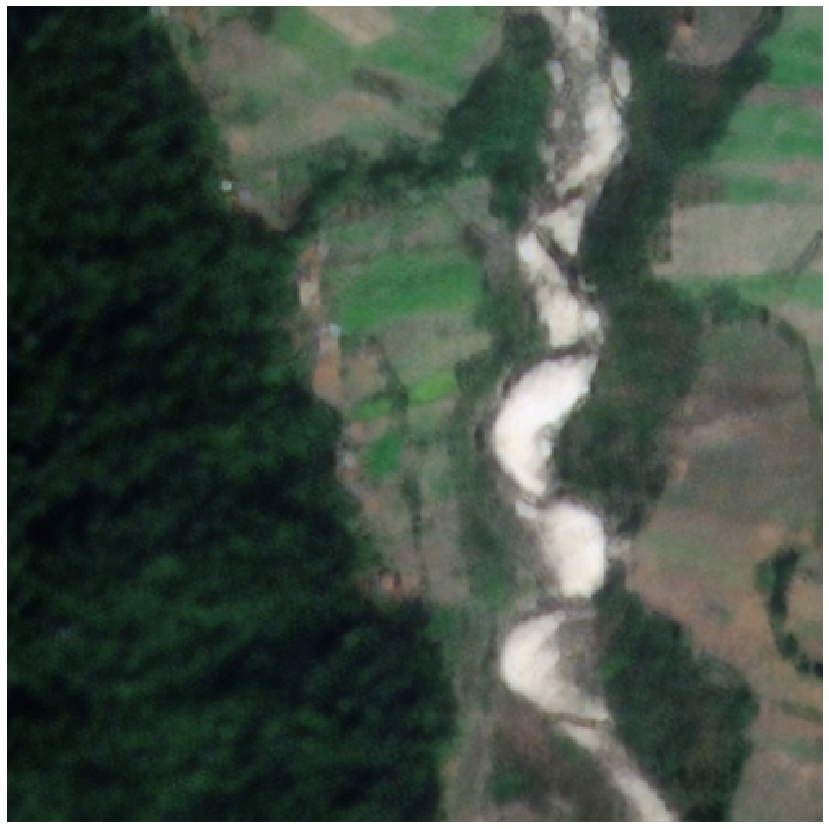

In [15]:
#5iters
Image(superres_1('./test/deepimageprior_3kiters.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


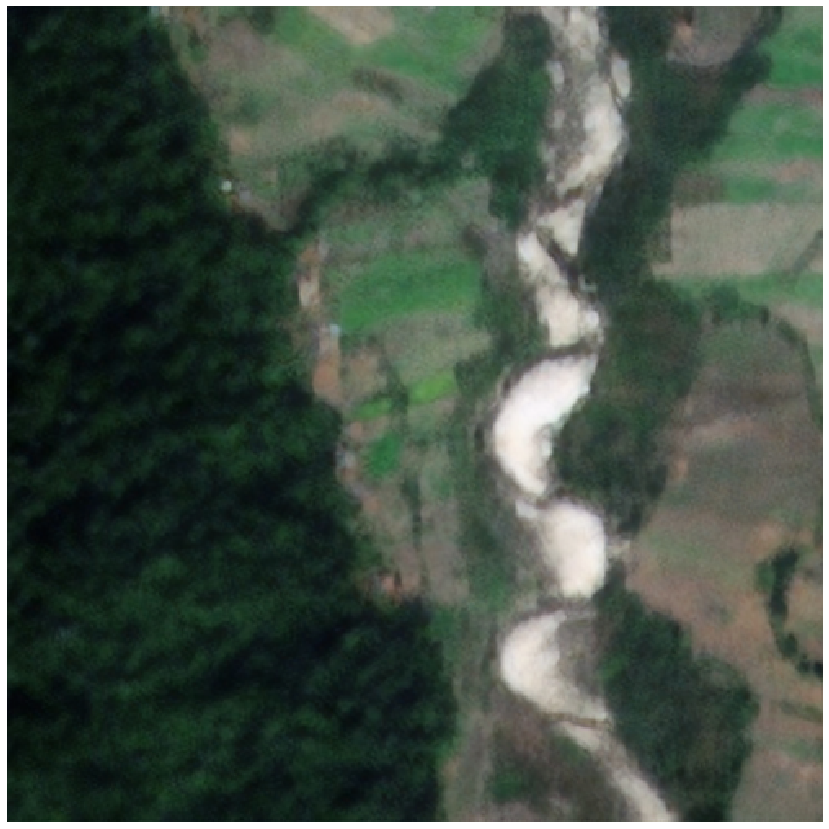

In [17]:
#10 iters
Image(superres_1('./test/deepimageprior_3kiters.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


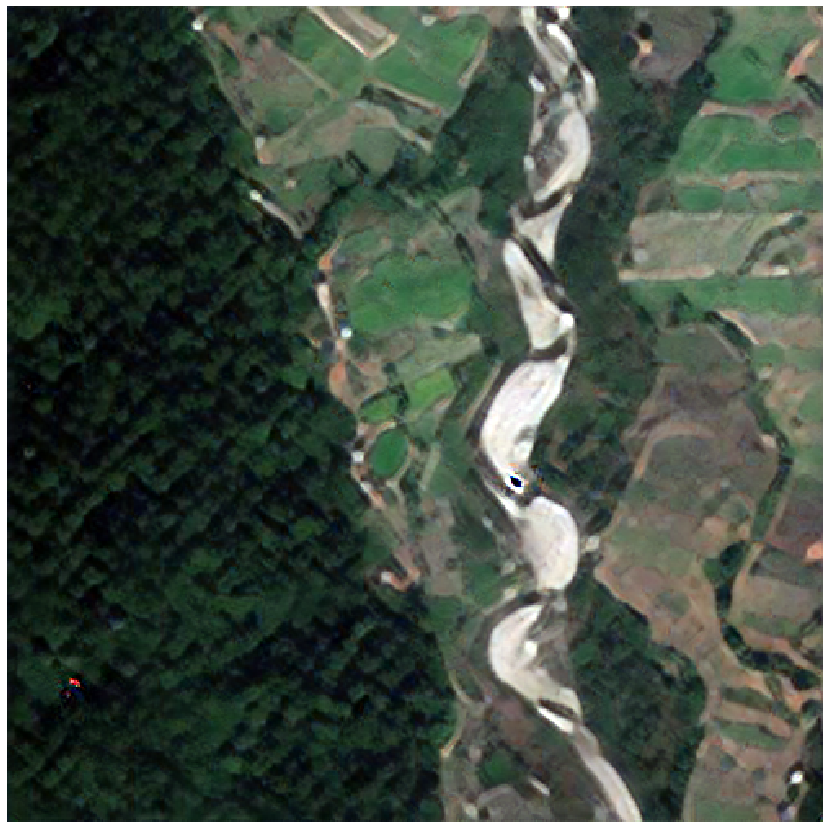

In [22]:
#Original gen
Image(superres_1('./test/srgan-gold-standard-test.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


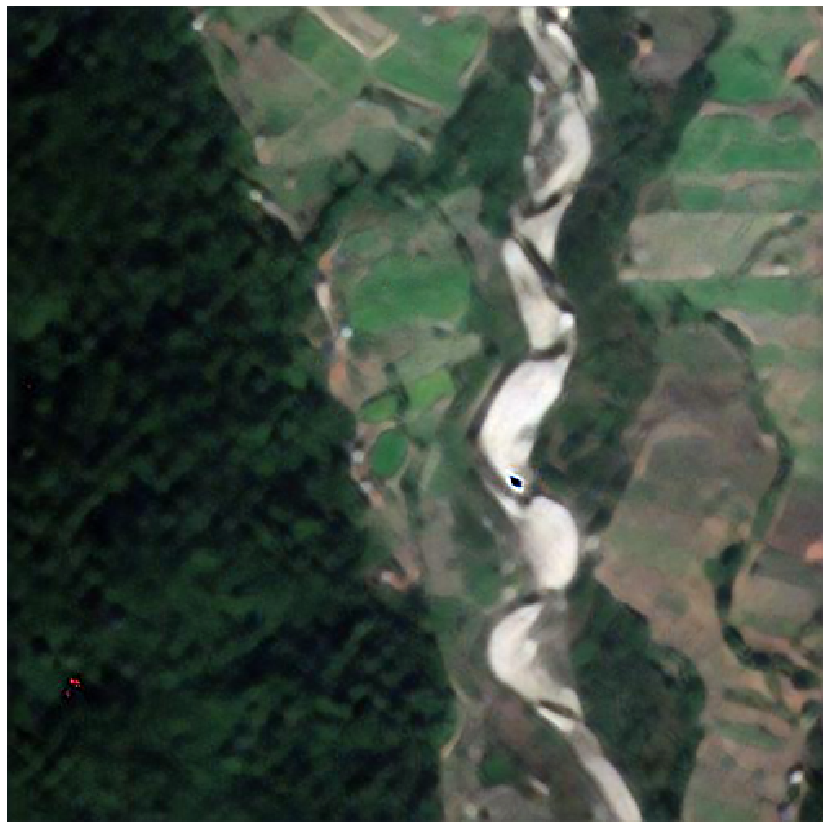

In [20]:
#5 iters
Image(superres_1('./test/srgan-gold-standard-test.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


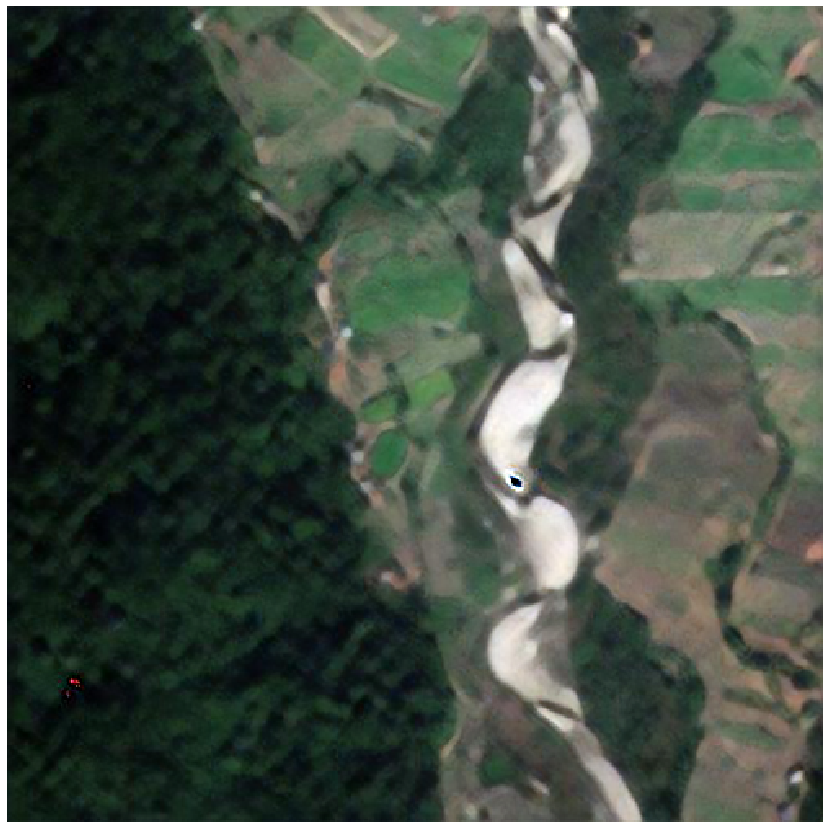

In [18]:
#10 iters
Image(superres_1('./test/srgan-gold-standard-test.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


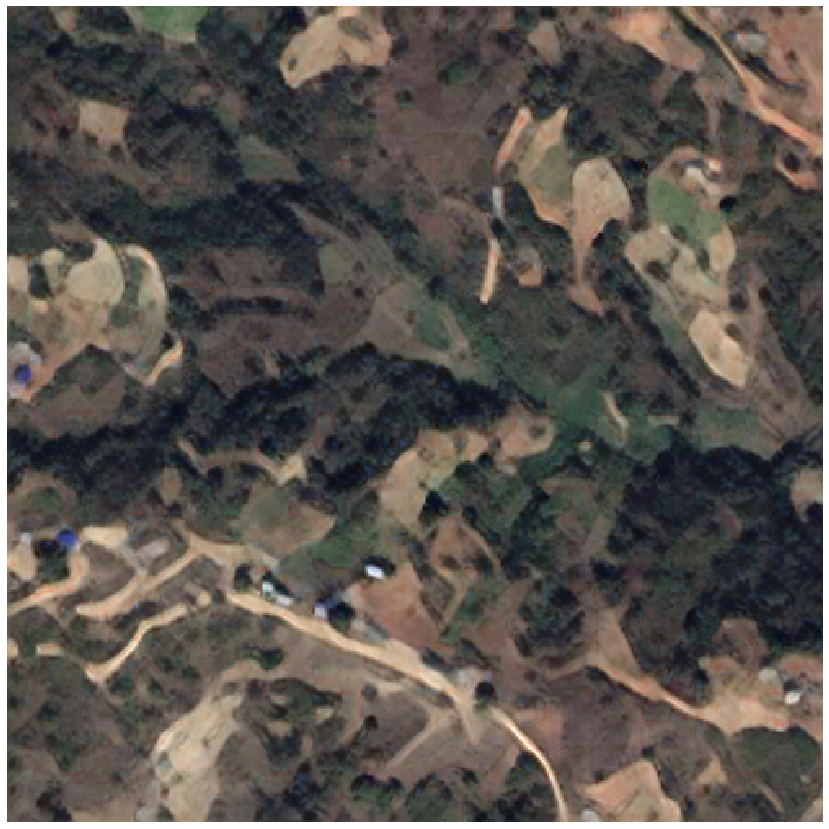

In [23]:
#10 iters
Image(superres_1('./test/0_00_fake.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


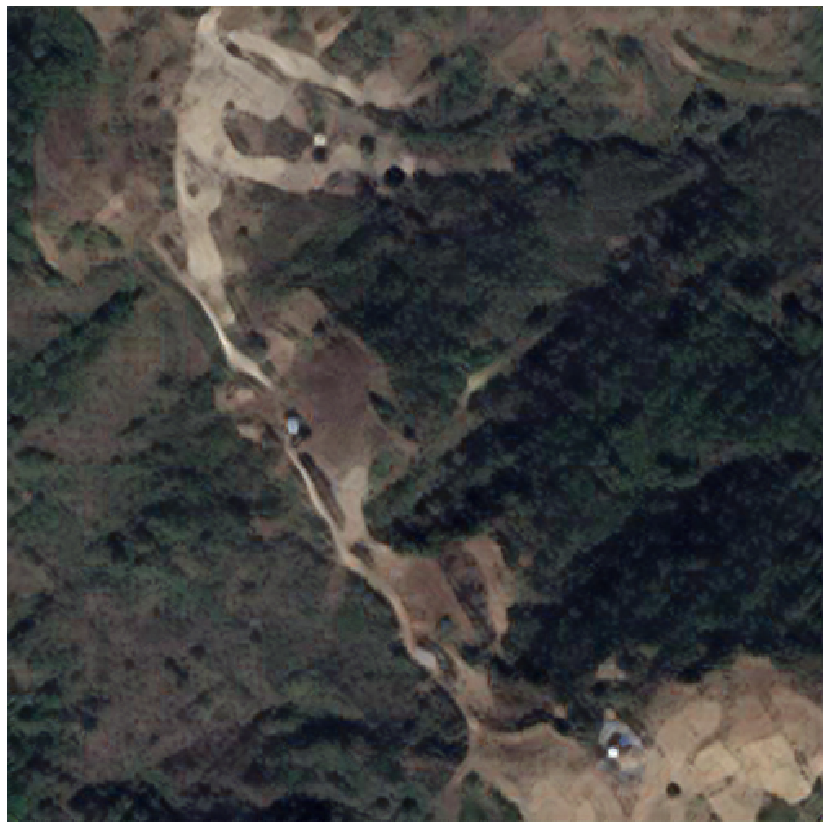

In [24]:
#10 iters
Image(superres_1('./test/1_00_fake.jpg')).show(figsize=(18,15))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


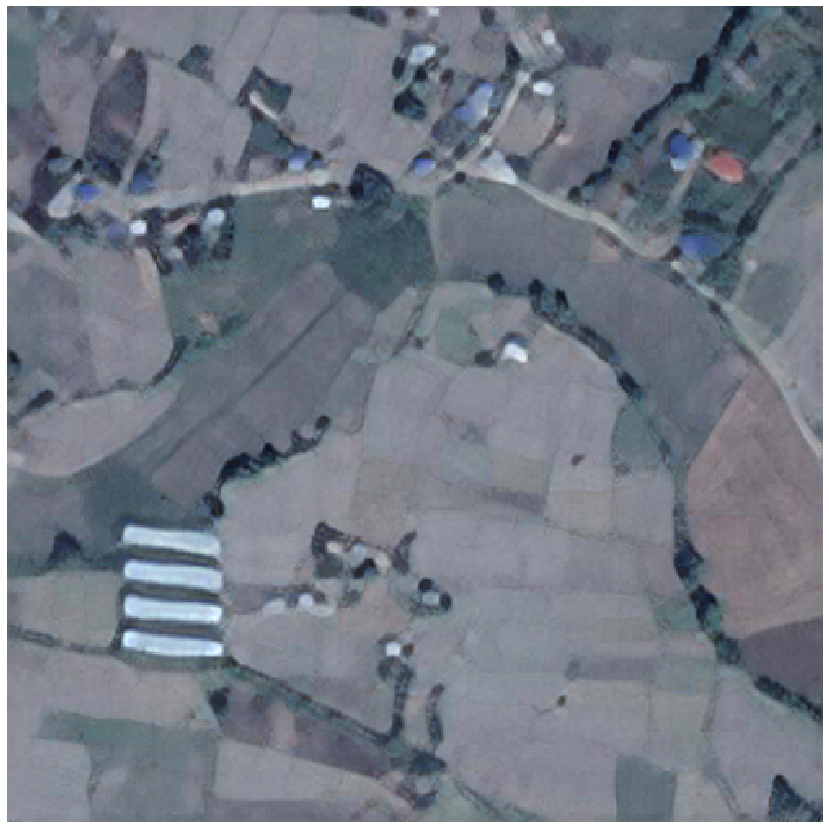

In [38]:
#10 iters
Image(superres_1('./test/2_00_fake.jpg')).show(figsize=(18,15))

In [44]:
import cv2
def blur_and_sr(path,ks=3):
    img= cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    
    #3 seems to work best
    blur = cv2.GaussianBlur(img,(ks,ks),0)
    blur = cv2.resize(blur,(570,570))
    t = Image(tensor(blur/225.).permute(2,0,1).float())
    p,img_hr,b = learn_gen.predict(t)
    return img_hr

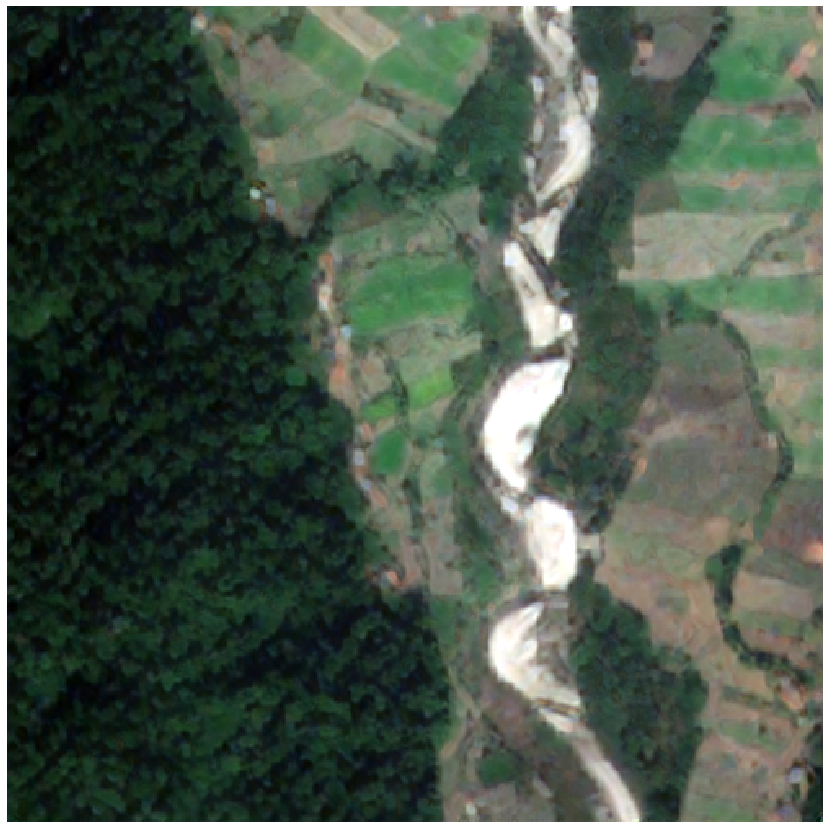

In [60]:
Image(blur_and_sr('./test/test_scale_1-2.tif',ks=23).clamp(0,1)).show(figsize=(18,15))